In [3]:
# to be removed from public example
import sys
sys.path.append('/Users/lucasmueller/Repositories/DeepSMLM')

In [17]:
import decode
import torch
import matplotlib.pyplot as plt

# DECODE - Evaluation
In the following we show what DECODE provides in terms of evaluation. Please be advised to have a read of the Introduction notebook first.
Evaluation always acts on two sets of emitters, mostly prediction and reference (i.e. ground truth). In the following we show some toy examples.

## Evaluation Pipeline
The evaluation workflow is almost always
1. Definition of reference and candidate (=prediction) EmitterSet
2. Matching of reference and candidate
3. Evaluation of Detection and Localization Metrics

In [35]:
# dummy emittersets
em_ref = decode.RandomEmitterSet(200, xy_unit='px', px_size=(100., 100.))
em_ref.frame_ix = torch.randint_like(em_ref.frame_ix, low=0, high=20)

em_pred = em_ref.clone()  # make independent copy
em_pred = em_pred[torch.rand(len(em_pred)) <= 0.8]  # through away random subset of 20%
em_pred.xyz += torch.randn_like(em_pred.xyz)  # wiggle coordinates a bit around

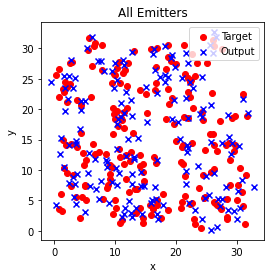

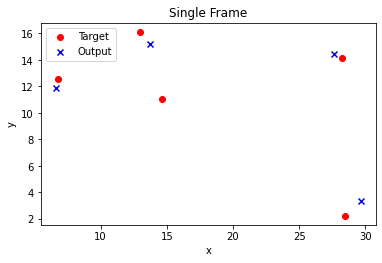

In [36]:
# plot all emitters
decode.plot.PlotCoordinates(pos_tar=em_ref.xyz_px, 
                            pos_out=em_pred.xyz_px).plot()
plt.legend()
plt.title('All Emitters')
plt.show()

# plot on a selected frame
decode.plot.PlotCoordinates(pos_tar=em_ref[em_ref.frame_ix == 10].xyz_px, 
                            pos_out=em_pred[em_pred.frame_ix == 10].xyz_px).plot()
plt.legend()
plt.title('Single Frame')
plt.show()

## Matching
We perform matching like in the challenge. This means that one defines a search radius in which predictions are considered true positives. We have 1:1 matches.

In [43]:
matcher = decode.evaluation.match_emittersets.GreedyHungarianMatching(match_dims=3, dist_lat=250, dist_ax=500.)  # always in nm

tp, fp, fn, tp_match = matcher.forward(em_pred, em_ref)  # outputs true positives, false positives, false negatives, matched ground truth

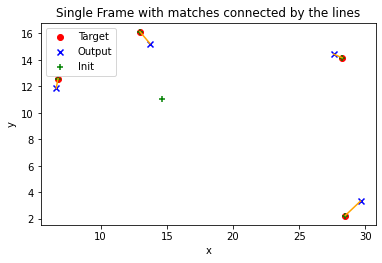

In [54]:
# plot
# plot on a selected frame
decode.plot.PlotCoordinates(pos_tar=tp_match[tp_match.frame_ix == 10].xyz_px, 
                            pos_out=tp[tp.frame_ix == 10].xyz_px,
                            pos_ini=em_ref[em_ref.frame_ix == 10].xyz_px,
                            match_lines=True).plot()

plt.legend()
plt.title('Single Frame with matches connected by the lines')
plt.show()

## Detection and Localization Performance

In [68]:
evaluator = decode.evaluation.SMLMEvaluation()

result = evaluator.forward(tp, fp, fn, tp_match)

In [71]:
result._asdict()

{'prec': 0.9683544303797469,
 'rec': 0.765,
 'jac': 0.7463414634146341,
 'f1': 0.8547486033519555,
 'effcy_lat': -0.30695413245193864,
 'effcy_ax': 0.7454920096445948,
 'effcy_vol': 0.2192689385963281,
 'rmse_lat': 128.21023559570312,
 'rmse_ax': 4.155304908752441,
 'rmse_vol': 128.27757263183594,
 'mad_lat': 147.11082458496094,
 'mad_ax': 1.474936842918396,
 'mad_vol': 148.5857696533203,
 'dx_red_mu': nan,
 'dx_red_sig': nan,
 'dy_red_mu': nan,
 'dy_red_sig': nan,
 'dz_red_mu': nan,
 'dz_red_sig': nan,
 'dphot_red_mu': nan,
 'dphot_red_sig': nan}